### **References**
- [https://regex101.com/](https://regex101.com/)

### **Example**

##### Problem
You have a chatbot to communicate with ppl who use the system. the chatbot might as something like "For verification purpose, can you tell me phone number and email id associated with this account". Then the user will reply with a different format, example:
- yes, phone: 1235678912 email:abc&#64;xyz&#46;com
- here it is: (123)-567-8912, abc&#64;xyz&#46;com
- you ask lot of question &#128512; 1235678912, abc&#64;xyz&#46;com  

How can we detect the email and the phone number of the input?

Let's say the format of the email and phone number are:  

abc&#64;xyz&#46;com: xxxx&#64;xxx&#46;com  
(123)-567-8912: (xxx)-xxx-xxxx  
1235678912: xxxxxxxxxx  

##### Using regex

In [2]:
import re

chat1 = 'yes, phone: 1235678912 email:abc@xyz.com'
chat2 = 'here it is: (123)-567-8912, abc@xyz.com'
chat3 = 'you ask lot of question 😀 1235678912, abc@xyz.com'

**Phone number**

*1235678912: xxxxxxxxxx*  
*(123)-567-8912: (xxx)-xxx-xxxx*

Write the regex with regex101

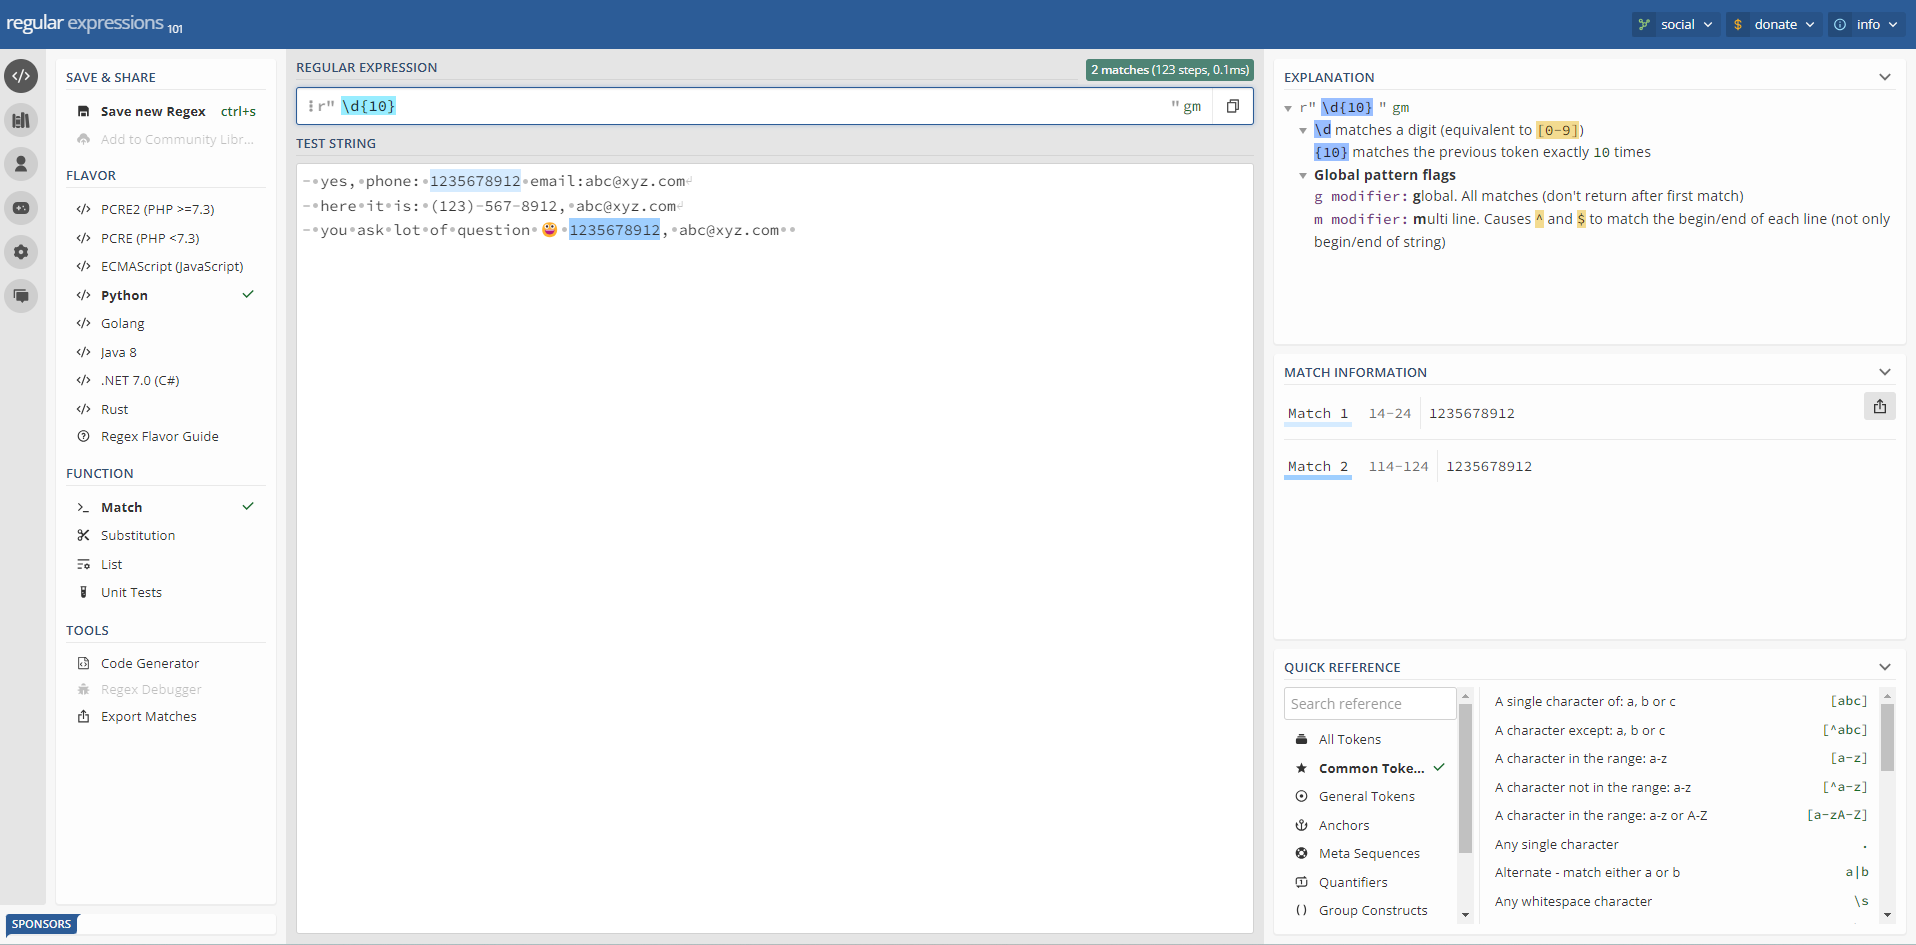

Verify the regex in python

In [7]:
phone_number_pattern = '\d{10}|\(\d{3}\)-\d{3}-\d{4}'

pn_matches_1 = re.findall(phone_number_pattern, chat1)
print('pn_matches_1', pn_matches_1)

pn_matches_2 = re.findall(phone_number_pattern, chat2)
print('pn_matches_2', pn_matches_2)

pn_matches_3 = re.findall(phone_number_pattern, chat3)
print('pn_matches_3', pn_matches_3)

pn_matches_1 ['1235678912']
pn_matches_2 ['(123)-567-8912']
pn_matches_3 ['1235678912']


**Email**  

*abc&#64;xyz&#46;com: xxxx&#64;xxx&#46;com*  

In [8]:
emaiL_pattern = '[a-zA-Z0-9_]*@[a-z]*\.[a-zA-Z0-9]*'

e_matches_1 = re.findall(emaiL_pattern, chat1)
print('e_matches_1', e_matches_1)

e_matches_2 = re.findall(emaiL_pattern, chat2)
print('e_matches_2', e_matches_2)

e_matches_3 = re.findall(emaiL_pattern, chat3)
print('e_matches_3', e_matches_3)

e_matches_1 ['abc@xyz.com']
e_matches_2 ['abc@xyz.com']
e_matches_3 ['abc@xyz.com']


##### Module

In [12]:
def get_pattern_match(pattern, text):
    matches = re.findall(pattern, text)
    if matches:
        return matches[0]

In [13]:
get_pattern_match(emaiL_pattern,chat1)

'abc@xyz.com'

##### Information extraction

In [9]:
text='''
Born	Elon Reeve Musk
June 28, 1971 (age 50)
Pretoria, Transvaal, South Africa
Citizenship	
South Africa (1971–present)
Canada (1971–present)
United States (2002–present)
Education	University of Pennsylvania (BS, BA)
Title	
Founder, CEO and Chief Engineer of SpaceX
CEO and product architect of Tesla, Inc.
Founder of The Boring Company and X.com (now part of PayPal)
Co-founder of Neuralink, OpenAI, and Zip2
Spouse(s)	
Justine Wilson
​
​(m. 2000; div. 2008)​
Talulah Riley
​
​(m. 2010; div. 2012)​
​
​(m. 2013; div. 2016)
'''

In [14]:
get_pattern_match(r'age (\d+)', text)

'50'

In [15]:
get_pattern_match(r'Born(.*)\n', text).strip()

'Elon Reeve Musk'

In [16]:
get_pattern_match(r'Born.*\n(.*)\(age', text).strip()

'June 28, 1971'

In [17]:
get_pattern_match(r'\(age.*\n(.*)', text)

'Pretoria, Transvaal, South Africa'

In [18]:
def extract_personal_information(text):
    age = get_pattern_match('age (\d+)', text)
    full_name = get_pattern_match('Born(.*)\n', text)
    birth_date = get_pattern_match('Born.*\n(.*)\(age', text)
    birth_place = get_pattern_match('\(age.*\n(.*)', text)
    return {
        'age': int(age),
        'name': full_name.strip(),
        'birth_date': birth_date.strip(),
        'birth_place': birth_place.strip()
    }

In [19]:
extract_personal_information(text)

{'age': 50,
 'name': 'Elon Reeve Musk',
 'birth_date': 'June 28, 1971',
 'birth_place': 'Pretoria, Transvaal, South Africa'}